## Result analysis

In [1]:
import numpy as np
import pandas as pd
import glob 
import os
pd.options.display.max_columns=50

In [2]:
results = glob.glob('./results/performances/*')

In [3]:
list1, list2 = zip(*sorted(zip([os.stat(result).st_size for result in results], results)))   

In [4]:
df = pd.read_csv(list2[-15])

In [5]:
df

,runID,data,num_train,num_valid,num_test,num_select,num_inspected,num_uninspected,num_test_illicit,test_illicit_rate,upper_bound_precision,upper_bound_recall,upper_bound_rev,sampling,initial_inspection_rate,current_inspection_rate,final_inspection_rate,inspection_rate_option,mode,subsamplings,weights,unc_mode,train_start,valid_start,test_start,test_end,numWeek,precision,recall,revenue,norm-precision,norm-recall,norm-revenue,save
0,1601928993,real-n,5102,1745,7037,351,351,6686,280,0.039790,0.795794,1.000000,1.0,hybrid,20,5.0,5,direct_decay,scratch,bATE/DATE,0.1/0.9,naive,13-01-01,13-01-25,13-02-01,13-02-08,1,0.1083,0.1357,0.1284,0.1360,0.1357,0.1284,0
1,1601928993,real-n,6847,351,9133,456,456,8677,357,0.039089,0.781780,1.000000,1.0,hybrid,20,5.0,5,direct_decay,scratch,bATE/DATE,0.1/0.9,naive,13-01-01,13-02-01,13-02-08,13-02-15,2,0.0855,0.1092,0.0709,0.1094,0.1092,0.0709,0
2,1601928993,real-n,7198,456,7842,392,392,7450,315,0.040168,0.803366,1.000000,1.0,hybrid,20,5.0,5,direct_decay,scratch,bATE/DATE,0.1/0.9,naive,13-01-01,13-02-08,13-02-15,13-02-22,3,0.1633,0.2032,0.1958,0.2032,0.2032,0.1958,0
3,1601928993,real-n,7654,392,7577,378,378,7199,343,0.045269,0.905372,1.000000,1.0,hybrid,20,5.0,5,direct_decay,scratch,bATE/DATE,0.1/0.9,naive,13-01-01,13-02-15,13-02-22,13-03-01,4,0.1164,0.1283,0.1373,0.1286,0.1283,0.1373,0
4,1601928993,real-n,8046,378,8861,443,443,8418,260,0.029342,0.586841,1.000000,1.0,hybrid,20,5.0,5,direct_decay,scratch,bATE/DATE,0.1/0.9,naive,13-01-01,13-02-22,13-03-01,13-03-08,5,0.1309,0.2231,0.1963,0.2231,0.2231,0.1963,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1601928993,real-n,49798,429,9643,482,482,9161,425,0.044073,0.881468,1.000000,1.0,hybrid,20,5.0,5,direct_decay,scratch,bATE/DATE,0.1/0.9,naive,13-01-01,14-10-31,14-11-07,14-11-14,93,0.6515,0.7388,0.8614,0.7391,0.7388,0.8614,0
93,1601928993,real-n,50227,482,9240,462,462,8778,387,0.041883,0.837662,1.000000,1.0,hybrid,20,5.0,5,direct_decay,scratch,bATE/DATE,0.1/0.9,naive,13-01-01,14-11-07,14-11-14,14-11-21,94,0.5714,0.6822,0.6458,0.6822,0.6822,0.6458,0
94,1601928993,real-n,50709,462,8545,427,427,8118,443,0.051843,1.000000,0.964447,1.0,hybrid,20,5.0,5,direct_decay,scratch,bATE/DATE,0.1/0.9,naive,13-01-01,14-11-14,14-11-21,14-11-28,95,0.7494,0.7223,0.6855,0.7494,0.7490,0.6855,0
95,1601928993,real-n,51171,427,8598,429,429,8169,414,0.048151,0.963015,1.000000,1.0,hybrid,20,5.0,5,direct_decay,scratch,bATE/DATE,0.1/0.9,naive,13-01-01,14-11-21,14-11-28,14-12-05,96,0.7413,0.7681,0.6759,0.7697,0.7681,0.6759,0


### Results of Individual Experiments

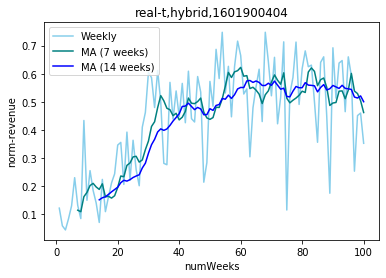

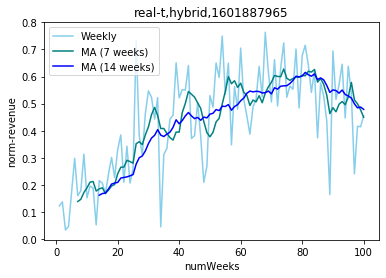

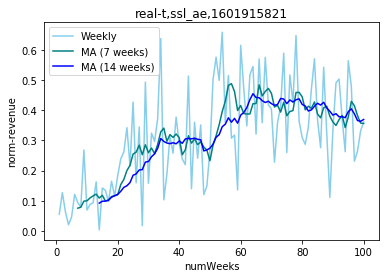

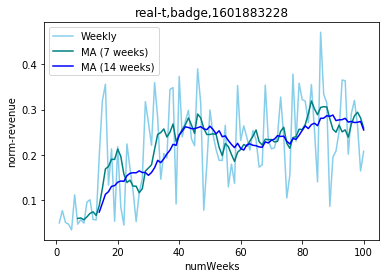

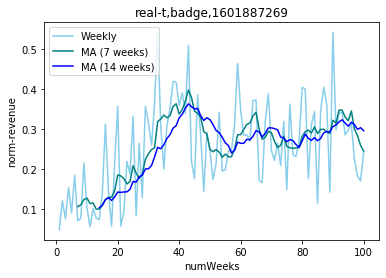

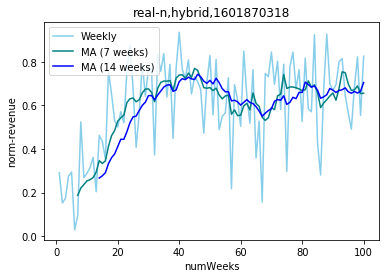

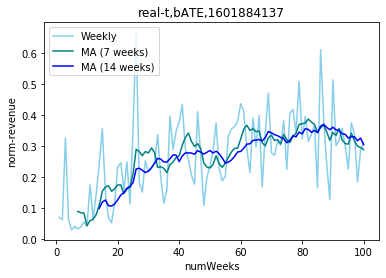

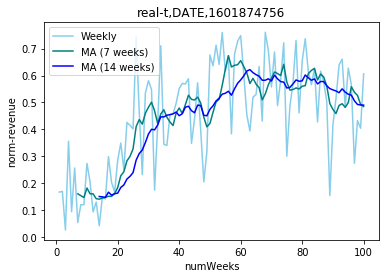

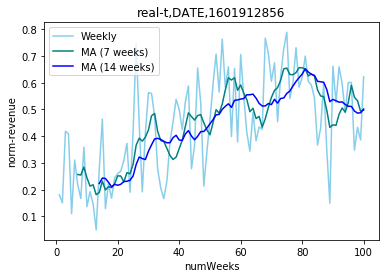

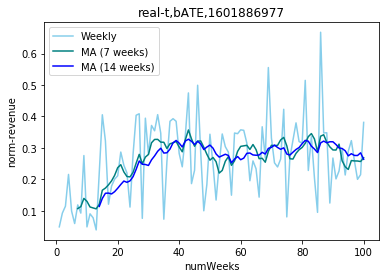

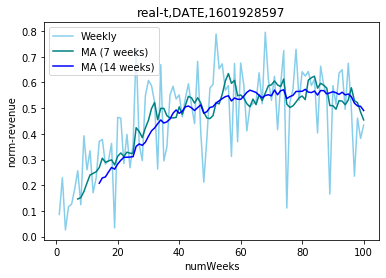

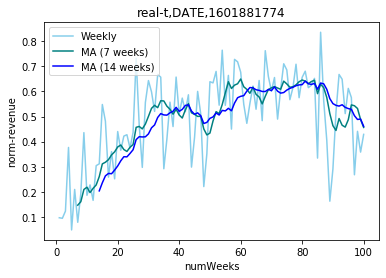

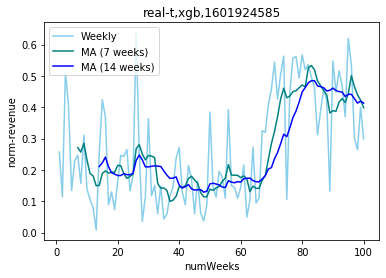

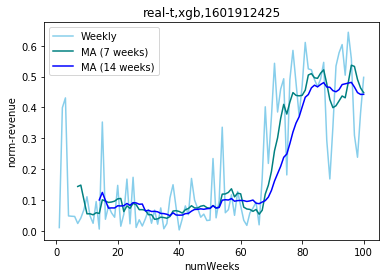

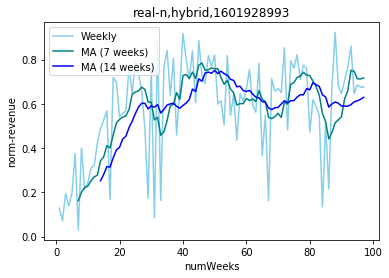

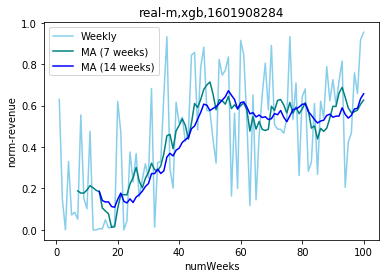

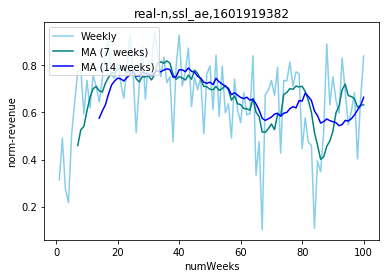

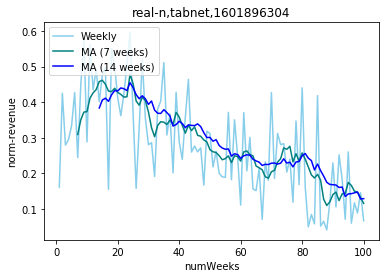

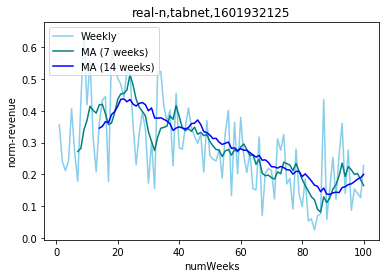

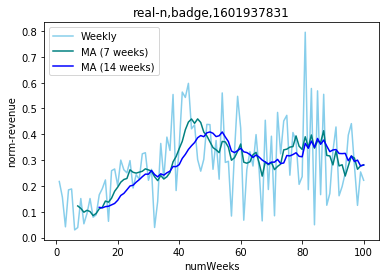

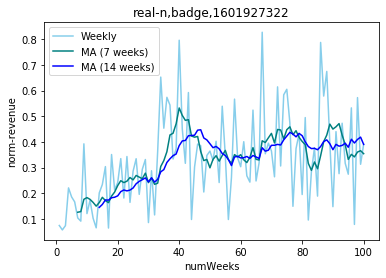

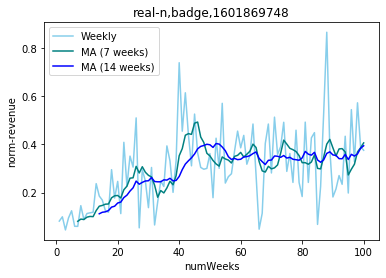

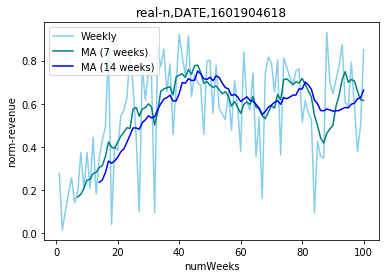

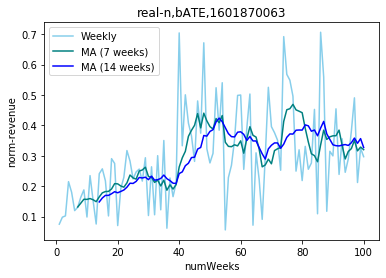

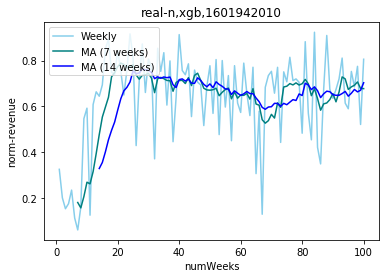

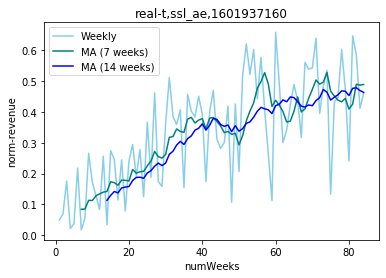

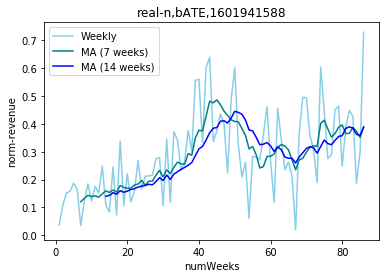

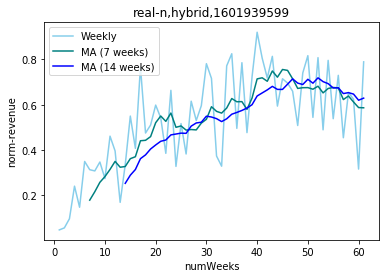

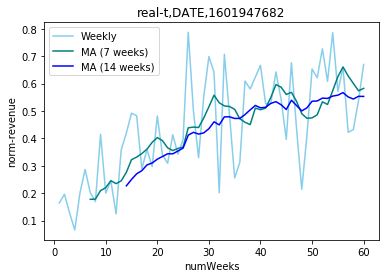

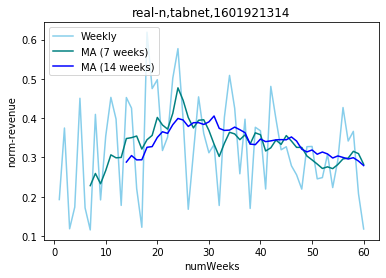

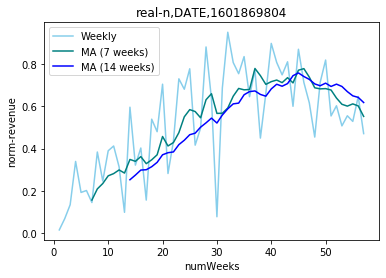

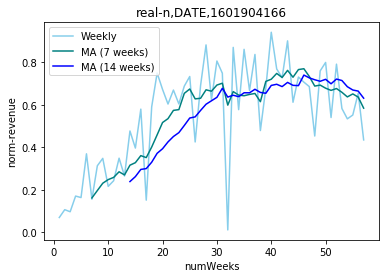

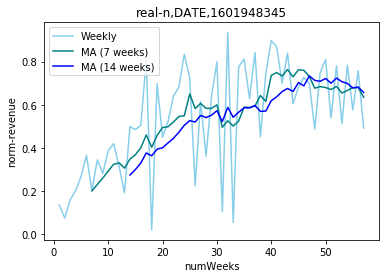

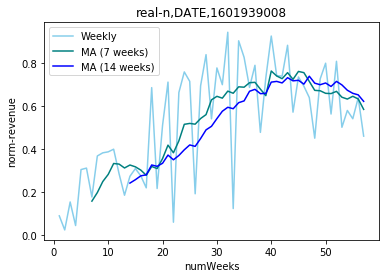

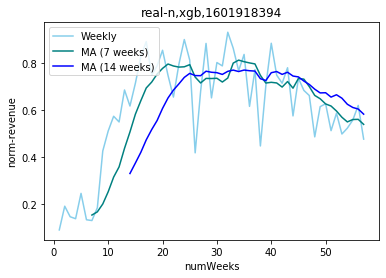

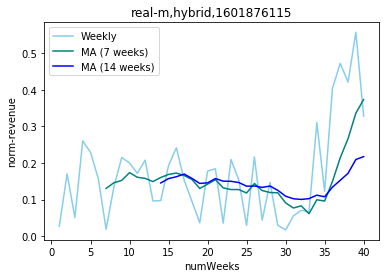

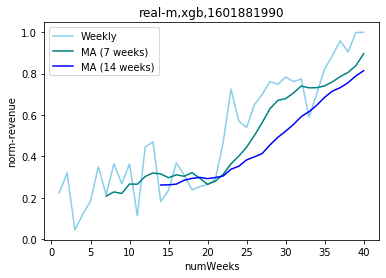

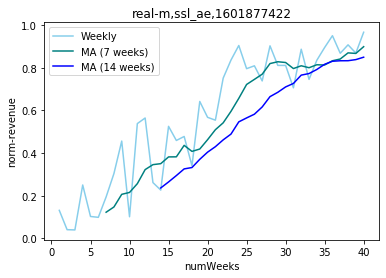

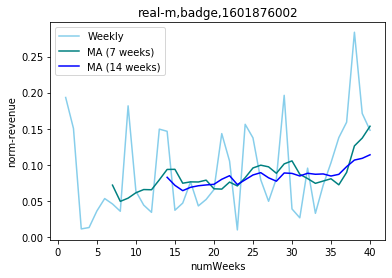

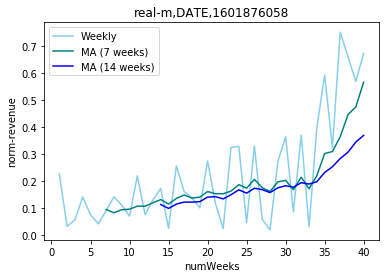

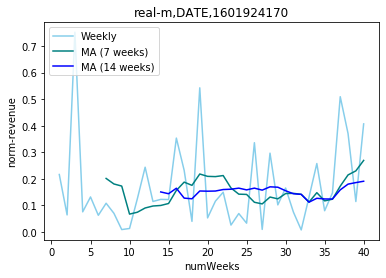

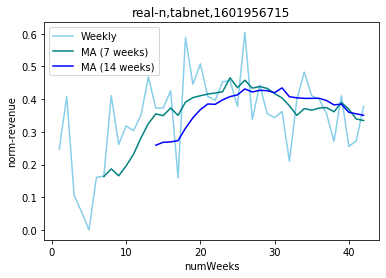

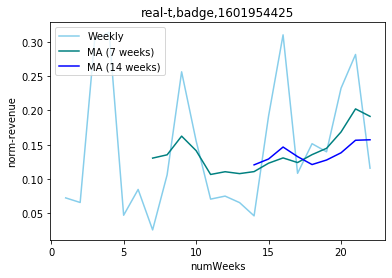

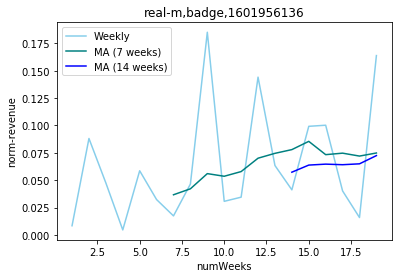

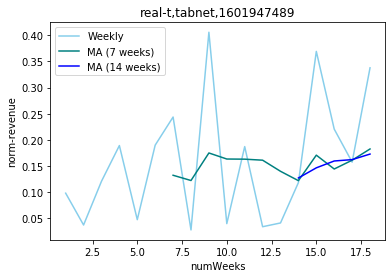

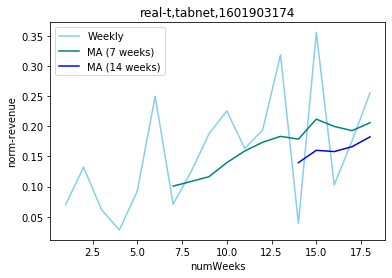

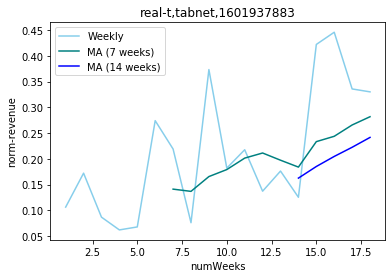

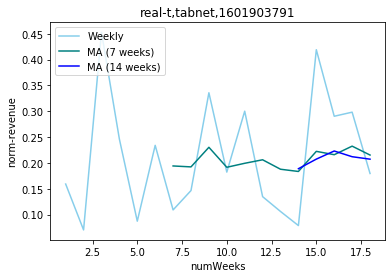

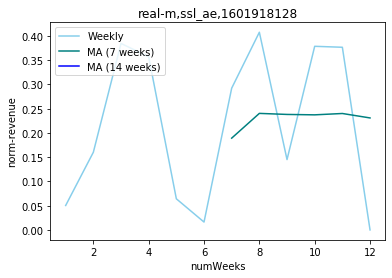

In [12]:
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

full_results = defaultdict(list)

# Retrieving results
for i in range(1,50):
    df = pd.read_csv(list2[-i])
    var = 'norm-revenue'
    plt.figure()
    rolling_mean7 = df[var].rolling(window=7).mean()
    rolling_mean14 = df[var].rolling(window=14).mean()
    
    filename = list2[-i][list2[-i].index('16'):list2[-i].index('16')+10]
    info = ','.join(list(df[['data', 'sampling']].iloc[0]))
    plt.title(info+','+filename)
    plt.plot(df['numWeek'], df[var], color='skyblue', label='Weekly')
    plt.plot(df['numWeek'], rolling_mean7, color='teal', label='MA (7 weeks)')
    plt.plot(df['numWeek'], rolling_mean14, color='blue', label='MA (14 weeks)')
    plt.legend(loc='upper left')
    plt.ylabel(var)
    plt.xlabel('numWeeks')
    plt.show()
    
    full_results[info].append(rolling_mean14)
    plt.close()
    
    

### Tdata Simulation Results

The number of trials for each setting (Results are averaged):
real-t,hybrid 2
real-t,ssl_ae 2
real-t,badge 3
real-t,bATE 2
real-t,DATE 5
real-t,xgb 2
real-t,tabnet 4


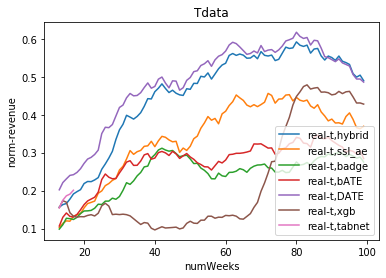

In [13]:
plt.figure()
info = ','.join(list(df[['data', 'sampling']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'real-t' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    print(key, len(full_results[key]))
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    plt.plot(avg_result.index, avg_result, label=key)
plt.legend(loc='lower right')
plt.ylabel(var)
plt.xlabel('numWeeks')
plt.title('Tdata')
plt.show()
full_results[info] = rolling_mean14
plt.close()

### Ndata Simulation Results

The number of trials for each setting (Results are averaged):
real-n,hybrid 3
real-n,ssl_ae 1
real-n,tabnet 4
real-n,badge 3
real-n,DATE 5
real-n,bATE 2
real-n,xgb 2


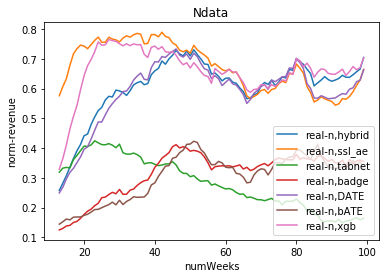

In [14]:
plt.figure()
info = ','.join(list(df[['data', 'sampling']].iloc[0]))

result_one_dataset = [key for key in full_results.keys() if 'real-n' in key]
print('The number of trials for each setting (Results are averaged):')
for key in result_one_dataset:
    print(key, len(full_results[key]))
    avg_result = pd.concat([*full_results[key]], axis=1).mean(axis=1)
    plt.plot(avg_result.index, avg_result, label=key)
plt.legend(loc='lower right')
plt.ylabel(var)
plt.xlabel('numWeeks')
plt.title('Ndata')
plt.show()
full_results[info] = rolling_mean14
plt.close()